In [1]:
en_file1 = '../data/train.lang1'
en_file2 = '../data/train.en.no-punctuation/unaligned.en'
fr_file1 = '../data/train.lang2'
fr_file2 = '../data/train.fr.tokenized/unaligned.fr'
en_files = [en_file1, en_file2]
fr_files = [fr_file1, fr_file2]
lang_files = [en_files, fr_files]
corpus_name = ['EN', 'FR']

In [2]:
import sys
sys.path.insert(1, '../code')
import pretrained_tokenizer

{'input_ids': [0, 923, 281, 261, 41, 722, 281, 1162, 289, 281, 1692, 279, 281, 597, 298, 281, 1053, 279, 281, 1807, 302, 281, 1752, 279, 268, 11, 327, 297, 314, 6746, 272, 289, 2566, 6531, 272, 637, 1666, 317, 348, 7728, 788, 3756, 272, 289, 723, 272, 264, 11, 2633, 561, 307, 2228, 302, 307, 1433, 276, 2, 1, 1, 1, 1, 1, 1, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]}
( DE ) Madame la Présidente , Monsieur le Commissaire , Mesdames et Messieurs , c' est un des signes de la pauvreté absolue de notre société que nous devions encore discuter de la question de l' égalité entre les hommes et les femmes .
{'input_ids': [0, 325, 266, 1347, 4806, 288, 266, 8313, 323, 647, 732, 1102, 14490, 1364, 2986, 1390, 299, 2709, 350, 1390, 330, 371, 87, 1809, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [3]:
t_fr = pretrained_tokenizer.Tokenizer(language='fr')
t_fr.MAX_LENGTH = 512
t_en = pretrained_tokenizer.Tokenizer(language='en')
t_en.MAX_LENGTH = 512

In [22]:
from collections import Counter
import numpy as np

def get_stats(t, lang_files):
    line_lengths = []
    my_counter = Counter()
    for lang_file in lang_files:
        with open(lang_file) as f:
            for line in f:
                encoded = t.encode(line)
                tokens = np.array(encoded['input_ids'])[np.array(encoded['attention_mask'])==1]
                line_lengths += [len(tokens)]
                for token in tokens:
                    my_counter.update([token])
    return my_counter, line_lengths

corpus_line_lengths = []
counters = []
my_counter, line_lengths = get_stats(t_en, en_files)
counters += [my_counter]
corpus_line_lengths += [line_lengths]

In [23]:
my_counter, line_lengths = get_stats(t_fr, fr_files)
counters += [my_counter]
corpus_line_lengths += [line_lengths]

In [24]:
for my_counter, corpus in zip(counters, corpus_name):
    print(f'number of unique tokens in {corpus} corpus: {len(my_counter)}')

number of unique tokens in EN corpus: 48285
number of unique tokens in FR corpus: 54698


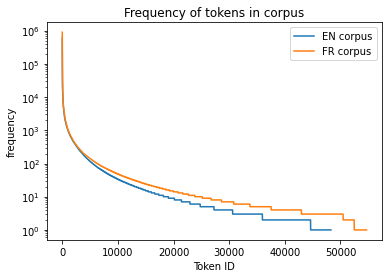

In [25]:
import matplotlib.pyplot as plt

for my_counter, corpus in zip(counters, corpus_name):
    plt.plot(range(len(my_counter.values())), sorted(my_counter.values(), reverse=True), label=f'{corpus} corpus')
    plt.yscale('log')
    plt.xlabel('Token ID')
    plt.ylabel('frequency')
    plt.title(f'Frequency of tokens in corpus')
plt.legend()
plt.show()

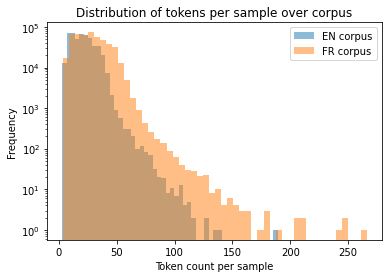

In [54]:
for line_lengths, corpus in zip(corpus_line_lengths, corpus_name):
    plt.hist(line_lengths, bins=50, alpha=0.5, label=f'{corpus} corpus')
plt.xlabel('Token count per sample')
plt.ylabel('Frequency')
plt.yscale('log')
plt.title(f'Distribution of tokens per sample over corpus')
plt.legend()
plt.show()

In [27]:
for line_lengths, corpus in zip(corpus_line_lengths, corpus_name):
    print(f'max number of tokens per {corpus} sentence: {max(line_lengths)}')

max number of tokens per EN sentence: 189
max number of tokens per FR sentence: 266


In [93]:
def compute_coverage(line_lengths, max_length):
    pct = np.sum(np.array(line_lengths) < max_length) / len(line_lengths) * 100.0
    return pct

def multi_compute_coverage(line_lengths, max_lengths):
    pcts = []
    for l in max_lengths:
        pcts += [compute_coverage(line_lengths, l)]
    return pcts

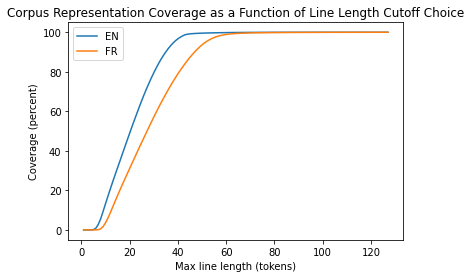

In [103]:
x = range(1,128)
y1 = multi_compute_coverage(corpus_line_lengths[0], x)
y2 = multi_compute_coverage(corpus_line_lengths[1], x)
plt.plot(x,y1,label='EN')
plt.plot(x,y2,label='FR')
plt.xlabel('Max line length (tokens)')
plt.ylabel('Coverage (percent)')
plt.title('Corpus Representation Coverage as a Function of Line Length Cutoff Choice')
plt.legend()
plt.show()

In [94]:
for line_lengths, corpus in zip(corpus_line_lengths, corpus_name):
    pct = compute_coverage(line_lengths, 64)
    print(f'{corpus} Coverage with line length {64}: {pct}%')

EN Coverage with line length 64: 99.8680412371134%
FR Coverage with line length 64: 99.36969072164949%


In [53]:
for my_counter, corpus in zip(counters, corpus_name):
    print(f'Most common tokens in {corpus} corpus: {my_counter.most_common(10)}')
    print(f'Decoded: {[t_en.decode([t[0]]) for t in my_counter.most_common(10)]}')

Most common tokens in EN corpus: [(266, 599638), (0, 485000), (2, 485000), (282, 285881), (288, 281662), (299, 231661), (286, 195339), (263, 167964), (306, 157777), (310, 157378)]
Decoded: [' the', '', '', ' to', ' of', ' and', ' in', ' a', ' is', ' that']
Most common tokens in FR corpus: [(281, 899530), (0, 485000), (2, 485000), (272, 471563), (276, 471474), (11, 467177), (279, 459546), (289, 305467), (264, 229172), (302, 215907)]
Decoded: [' m', '', '', 'er', 'it', "'", ' b', 'al', 'in', 'le']
